<a href="https://colab.research.google.com/github/jwa0301/Personal-study/blob/main/Transformers_101/Transformers_1_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2024-01-06 완료

#1

In [1]:
!pip install transformers

In [2]:
import transformers
print(transformers.__version__)


4.35.2


#2

In [3]:
from transformers import pipeline
sentiment = pipeline('sentiment-analysis')


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [4]:
sentiment.model

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

In [5]:
print(sentiment(["I like Olympic games as it's very exciting."]))
print(sentiment(["I'm against to hold Olympic games in Tokyo in terms of preventing the covid19 to be spread."]))


[{'label': 'POSITIVE', 'score': 0.9998026490211487}]
[{'label': 'NEGATIVE', 'score': 0.9791859984397888}]


# 3

In [6]:
from transformers import pipeline

qa = pipeline("question-answering")

# 여러 줄로 이루어진 문장을 인용할 경우 """를 인용부호로 사용
olympic_wiki_text = """
The 2020 Summer Olympics (Japanese: 2020年夏季オリンピック, Hepburn: Nisen Nijū-nen Kaki Orinpikku), officially the Games of the XXXII Olympiad (第三十二回オリンピック競技大会, Dai Sanjūni-kai Orinpikku Kyōgi Taikai) and branded as Tokyo 2020 (東京2020), is an ongoing international multi-sport event being held from 23 July to 8 August 2021 in Tokyo, Japan, with some preliminary events that began on 21 July.

Tokyo was selected as the host city during the 125th IOC Session in Buenos Aires, Argentina, on 7 September 2013.[3] Originally scheduled to take place from 24 July to 9 August 2020, the event was postponed to 2021 in March 2020 as a result of the COVID-19 pandemic, the first such instance in the history of the Olympic Games (previous games had been cancelled but not rescheduled).[4] However, the event retains the Tokyo 2020 name for marketing and branding purposes.[5] It is being held largely behind closed doors with no public spectators permitted due to the declaration of a state of emergency.[b] The Summer Paralympics will be held between 24 August and 5 September 2021, 16 days after the completion of the Olympics.[6]

The 2020 Games are the fourth Olympic Games to be held in Japan, following the Tokyo 1964 (Summer), Sapporo 1972 (Winter), and Nagano 1998 (Winter) games.[c] Tokyo is the first city in Asia to hold the Summer Games twice. The 2020 Games are the second of three consecutive Olympics to be held in East Asia, following the 2018 Winter Olympics in Pyeongchang, South Korea, and preceding the 2022 Winter Olympics in Beijing, China.

The 2020 Games introduced new competitions and re-introduced competitions that once were held but were subsequently removed. New ones include 3x3 basketball, freestyle BMX and mixed gender team events in a number of existing sports, as well as the return of madison cycling for men and an introduction of the same event for women. New IOC policies also allow the host organizing committee to add new sports to the Olympic program for just one Games. The disciplines added by the Japanese Olympic Committee are baseball and softball, karate, sport climbing, surfing, and skateboarding, the last four of which make their Olympic debuts.[7]

Bermuda, the Philippines, and Qatar won their first-ever Olympic gold medals.[8][9][10] San Marino, Turkmenistan, and Burkina Faso won their first-ever Olympic medals.[11][12][13]

"""
print(qa(question="What caused Tokyo Olympic postponed?", context=olympic_wiki_text))


No model was supplied, defaulted to distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

{'score': 0.6619062423706055, 'start': 635, 'end': 652, 'answer': 'COVID-19 pandemic'}


In [7]:
qa.model

DistilBertForQuestionAnswering(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
      

# Preparation

In [8]:
import torch
torch.cuda.is_available()


True

# 4

In [9]:
# 아래 코딩 실행 후 코랩 메뉴에서 '런타임' -> '런타임 다시 시작'을 눌러야 하나
# 이 조치가 필요한 코딩이 두 개 더 이어져서 그것까지 실행 후 '런타임 다시 시작'을 실행하세요.

!pip install torchtext==0.15.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 MB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/173.2 MB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━

In [10]:
!pip install portalocker==2.7.0


In [11]:
# 이 코딩까지 실행 후 코랩 메뉴에서 '런타임' -> '런타임 다시 시작'을 클릭하세요.
!pip install accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 2.4 MB/s eta 0:00:00


In [1]:
from torchtext.datasets import IMDB

train_iter = IMDB(split='train')
test_iter = IMDB(split='test')


In [2]:
# 런타임 약 30초 소요
# 출력 결과를 고정하기 위해 random.seed 도입
import random
random.seed(6)

# train_iter를 리스트 타입으로 변경
train_lists = list(train_iter)
test_lists = list(test_iter)

# 각기 1000개씩 랜덤 샘플링
train_lists_small = random.sample(train_lists, 1000)
test_lists_small = random.sample(test_lists, 1000)

# 각 변수에 담긴 인덱스 0에 해당하는 원소, 즉 첫번째 원소 출력
print(train_lists_small[0])
print(test_lists_small[0])


(2, "I LOVED this movie! I am biased seeing as I am a huge Disney fan, but I really enjoyed myself. The action takes off running in the beginning of the film and just keeps going! This is a bit of a departure for Disney, they don't spend quite as much time on character development (my husband pointed this out)and there are no musical numbers. It is strictly action adventure. I thoroughly enjoyed it and recommend it to anyone who loves Disney, be they young or old.")
(1, 'This was an abysmal show. In short it was about this kid called Doug who guilt-tripped a lot. Seriously he could feel guilty over killing a fly then feeling guilty over feeling guilty for killing the fly and so forth. The animation was grating and unpleasant and the jokes cheap. <br /><br />It aired here in Sweden as a part of the "Disney time" show and i remember liking it some what but then i turned 13.<br /><br />I never got why some of the characters were green and purple too. What was up with that? <br /><br />Tru

In [9]:
# train_texts와 train_labels라는 컨테이너 생성
# 아래 반복분에서 생성된 결과를 담는 그릇으로서 역할 수행
train_texts = []
train_labels = []

# for 반복문
# train_lists_small에 담긴 튜플 쌍 원소를 변수명 label과 text를 부여하여 순서대로 추출
for label, text in train_lists_small:
  # IMDB 데이터의 기존 레이블 2를 1로 변경, 기존 레이블 1을 0으로 변경
  train_labels.append(1 if label == 2 else 0)
  train_texts.append(text)

# text_texts와 test_labels라는 컨테이너 생성
test_texts = []
test_labels = []

# for 반복문
for label, text in test_lists_small:
  # IMDB 데이터의 기존 레이블 2를 1로 변경, 기존 레이블 1을 0으로 변경
  test_labels.append(1 if label == 2 else 0)
  test_texts.append(text)

# 각 변수에 담긴 인덱스 0에 해당하는 원소, 즉 첫번째 원소 출력
print(train_texts[0])
print(train_labels[0])
print(test_texts[0])
print(test_labels[0])


I LOVED this movie! I am biased seeing as I am a huge Disney fan, but I really enjoyed myself. The action takes off running in the beginning of the film and just keeps going! This is a bit of a departure for Disney, they don't spend quite as much time on character development (my husband pointed this out)and there are no musical numbers. It is strictly action adventure. I thoroughly enjoyed it and recommend it to anyone who loves Disney, be they young or old.
1
This was an abysmal show. In short it was about this kid called Doug who guilt-tripped a lot. Seriously he could feel guilty over killing a fly then feeling guilty over feeling guilty for killing the fly and so forth. The animation was grating and unpleasant and the jokes cheap. <br /><br />It aired here in Sweden as a part of the "Disney time" show and i remember liking it some what but then i turned 13.<br /><br />I never got why some of the characters were green and purple too. What was up with that? <br /><br />Truly a horri

#6

In [10]:
# train_test_split 결과를 고정하기 위해 random_state 지정
from sklearn.model_selection import train_test_split
train_texts, val_texts, train_labels, val_labels = train_test_split(train_texts, train_labels, test_size=.2,
                                                                    random_state=3)
print(len(train_texts))
print(len(train_labels))
print(len(val_texts))
print(len(val_labels))


800
800
200
200


#7

- 토큰 : 입력 텍스트의 기본 구성요소를 의미(ex. 단어, 글자)
- 토크나이징 : 입력 텍스트를 토큰으로 구분하는 과자ㅓㅇ
- 인코딩 : 잘게 구분된 토큰(텍스트 형태)을 숫자로 전환

In [ ]:
# 코랩 런타임이 끊어지는 경우만 다시 실행
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
# distilbert-base-uncased 모델에서 토크나이저 불러오기
from transformers import DistilBertTokenizerFast
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [13]:
# 토크나이징을 통한 인코딩
train_encodings = tokenizer(train_texts, truncation=True, padding=True)
val_encodings = tokenizer(val_texts, truncation=True, padding=True)
test_encodings = tokenizer(test_texts, truncation=True, padding=True)

# # 0번째 입력문(텍스트)의 5번째 토큰까지의 input_ids 출력
print(train_encodings["input_ids"][0][:8])

# 위의 결과를 디코딩하여 출력
print(tokenizer.decode(train_encodings["input_ids"][0][:8]))


[101, 4937, 11350, 2038, 2048, 1000, 7592, 14433]
[CLS] cat soup has two " hello kitty


위에서는 인코딩까지만, 임베딩은 특정 차원의 벡터로 변환해주는 것

# 8

In [18]:
import torch

# Dataset 클래스를 상속하는 IMDBDataset 클래스를 정의
class IMDbDataset(torch.utils.data.Dataset):

    # 생성자 __init__()
    # 자신을 가르키는 매개변수 self 포함
    # 변수를 저장하기 위해 self.변수명을 사용
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    # 자신을 가르키는 매개변수 self 포함
    def __getitem__(self, idx):
        # self.encoding에 담긴 키(key)와 키값(value)을 items()로 추출
        # 이 값을 key와 val 변수에 담아 새로운 키(key)와 키값(torch.tensor(val[idx]))를 갖는 딕셔너리 생성
        # 딕셔너리는 {"key1:value1", "key2:value2", ,,,} 형태를 지닌 파이썬 데이터 구조
        # val[idx]에 담긴 데이터를 torch.tensor()를 통해 파이토치 텐서로 변환
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}

        # self.lables[idx]에 담긴 데이터를 torch.tensor()를 통해 파이토치 텐서 변환
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    # 자신을 가르키는 매개변수 self 포함
    def __len__(self):
        return len(self.labels)

train_dataset = IMDbDataset(train_encodings, train_labels)
val_dataset = IMDbDataset(val_encodings, val_labels)
test_dataset = IMDbDataset(test_encodings, test_labels)


In [19]:
for i in train_dataset:
  print(i)
  break


{'input_ids': tensor([  101,  4937, 11350,  2038,  2048,  1000,  7592, 14433,  1000,  1011,
         2828, 18401,  2015, 28866,  2075,  2006,  1037, 13576,  4440,  2083,
         1996, 25115,  1010,  2073,  2505,  2064,  4148,  1010,  1998,  2515,
         1012,  2023,  2568,  1011,  4440,  4691,  4004,  2460,  3594,  2053,
        13764,  8649,  1010,  4942, 21532,  2773, 22163,  2612,  1012,  2045,
         2003,  2053,  2126,  1997,  7851,  2023, 17183, 14088,  9476,  3272,
         2000,  2425,  2017,  2000,  2156,  2009,  2005,  4426,  1012,  1998,
         2191,  2469,  2053,  2028,  2104,  2184,  2003,  1999,  1996,  2282,
         1012,  4487,  6491,  6633,  5677,  3672,  1998,  2064,  3490, 10264,
         2964,  1998, 18186,  1998,  9576,  2854,  1998,  5573,  2331,  1998,
         2655,  3560, 27770,  2005,  2500,  2024,  2691,  6991,  1012,  7481,
         1012,  3383,  1996,  2087, 13432,  3746,  2003,  2008,  1997,  2019,
        10777,  3605,  1997,  2300,  2008,  1996, 

# 9

In [28]:
from transformers import DistilBertForSequenceClassification

# distilbert 모델 불러오기
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased")
model


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

#10

In [29]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir='./results',          # 출력 디렉토리 경로
    num_train_epochs=8,              # 학습 에포크 수
    per_device_train_batch_size=16,  # 학습시 (디바이스 별) 미니 배치 수
    per_device_eval_batch_size=64,   # 평가시 (디바이스 별) 미니 배치 수
    warmup_steps=500,                # 학습률 스케줄링용 웜업 스텝 수

    weight_decay=0.01,               # 가중치 감쇄 강도
    logging_dir='./logs',            # 로그 디렉토리 경로
    logging_steps=10,
)


# 11

In [30]:
import torch

# GPU 사용이 가능한 경우 텐서 타입 데이터를 GPU로 전달
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)


In [31]:
!nvidia-smi

Sat Jan  6 11:52:47 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0              26W /  70W |    413MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# 12

In [32]:
# 파인튜닝 이전에 세 입력 문장 극성 판별
# 이는 한국어판을 취해 추가된 코드임
input_tokens = tokenizer(["I feel fantastic", "My life is going something wrong", "I have not figured out what the chosen title has to do with the movie."], truncation=True, padding=True)

# 입력 문장 토크나이징 결과(input_tokens)에 담긴 input_ids를 모델에 투입
# 그리고 모델 출력 결과를 GPU로 전송하며 값은 변수 outputs에 저장
outputs = model(torch.tensor(input_tokens['input_ids']).to(device))

# 레이블 딕셔너리 생성
label_dict = {1:'positive', 0:'negative'}

# outputs 변수에 담긴 logits 값을 행 단위, 즉 입력 문장 단위로 가장 큰 값 위치(인덱스) 추출
# 그 결과값(인덱스)을 cpu로 넘기고 넘파이 타입으로 변경 후, 인덱스에 매칭되는 레이블 출력
print([label_dict[i] for i in torch.argmax(outputs['logits'], axis=1).cpu().numpy()])

We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


['negative', 'negative', 'positive']


- 원래 모델의 출력값은 2개인데 만약 4개의 class로 분류하고 싶다면 모델을 불러올 때 num_labels를 조정해주면 된다.  
ex) model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', ***num_labels=4***)

In [33]:
# 런타임 약 4 혹은 5분 소요
# 딥러닝 모델의 특성상 결과가 매번 약간 다르게 나올 수 있슴
from transformers import Trainer
trainer = Trainer(
    model=model,                      # 사전학습 모델 인스턴스화
    args=training_args,               # TrainingArguments에 정의한 하이퍼 파라미터값 가져오기
    train_dataset=train_dataset,      # 학습 데이터세트
    eval_dataset=val_dataset          # evaluation 데이터세트
)

trainer.train()


Step,Training Loss
10,0.690700
20,0.690200
30,0.691500
40,0.686700
50,0.686900
60,0.677600
70,0.670700
80,0.640500
90,0.612800
100,0.520400


TrainOutput(global_step=400, training_loss=0.26853057963307947, metrics={'train_runtime': 298.0575, 'train_samples_per_second': 21.472, 'train_steps_per_second': 1.342, 'total_flos': 847791351398400.0, 'train_loss': 0.26853057963307947, 'epoch': 8.0})

In [34]:
# Trainer.train()에 의한 파인튜팅 이후 세 입력 문장 극성 판별
input_tokens = tokenizer(["I feel fantastic", "My life is going something wrong", "I have not figured out what the chosen title has to do with the movie."], truncation=True, padding=True)
outputs = model(torch.tensor(input_tokens['input_ids']).to(device))
# 영어 원문의 1과 0값과 달리 일반적인 용례에 따라 변경
label_dict = {1:'positive', 0:'negative'}
print([label_dict[i] for i in torch.argmax(outputs['logits'], axis=1).cpu().numpy()])

['positive', 'negative', 'negative']


In [35]:
# 문제14에서 언급한 Trainer.train( ) 방식의 성과지표로서의 정확도를 여기서 구함
# 모델 14의 주 10번 참조
# 모델을 eval 모드로 전환
model.eval()

# 문제 14 코딩의 변수 l과 혼동을 피하기 위해 컨테이너 리스트 l2 생성
l2 = []

# 반복 루프
for test_text in test_texts:

  # 토크나이징을 통한 인코딩
  input_tokens = tokenizer([test_text], truncation=True, padding=True)

  # 모델을 사용한 추론
  outputs = model(torch.tensor(input_tokens['input_ids']).to(device))

  # outputs에 담긴 logits값을 기준으로 행 단위로, 즉 입력 문장 단위로 가장 큰 logits값의 인덱스를 출력 후
  # item( )을 사용하여 결과물 텐서를 CPU로 전송
  # 이렇게 처리된 값을 입력문장별로 append( )를 통해 컨테이너 리스트 l에 하나씩 저장
  l2.append(torch.argmax(outputs['logits'], axis=1).item())

# 변수 correct_cnt 초기값을 0으로 설정
correct_cnt = 0

# 리스트 l과 test_labels를 zip( )을 통해 쌍(pair)으로 묶은 후 각기 pred와 ans라는 변수로 추출
# zip()안의 데이터 쌍이 소진될 때까지 if문을 반복하여 계속 실행
for pred, ans in zip(l2, test_labels):
  if pred == ans:
    correct_cnt += 1

# 정확도(accuracy) 계산
# 딥러닝 모델의 특성상 실행시마다 성과지표가 약간 다르게 산출될 수 있음
# correct_cnt는 pred와 ans가 일치하는 건수의 총합
# test_labels는 레이블 개수의 총합, 즉 입력 문장 전체 건수
print(correct_cnt/len(test_labels))

0.862


# 13

In [36]:
# test_inference 함수 생성
def test_inference(model, tokenizer):
  input_tokens = tokenizer(["I feel fantastic", "My life is going something wrong", "I have not figured out what the chosen title has to do with the movie."], truncation=True, padding=True)
  outputs = model(torch.tensor(input_tokens['input_ids']).to(device))
  # 영어 원문의 1과 0값 배정고 달리 일반적인 용례에 따라 변경
  label_dict = {1:'positive', 0:'negative'}
  return [label_dict[i] for i in torch.argmax(outputs['logits'], axis=1).cpu().numpy()]

In [37]:
# 런타임 5분 30초 소요
from torch.utils.data import DataLoader
from transformers import DistilBertForSequenceClassification, AdamW
from transformers import DistilBertTokenizerFast

#１） 사전학습 모델과 토크나이저 불러오기
#    그리고 모델 실행결과에 to(devic) 코드 추가(가능한 경우 결과를 GPU에 전달)
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased')
model.to(device)

# 파인튜닝 이전 모델을 사용하여 test_inference 함수 실행
print(test_inference(model, tokenizer))

#２）DataLoader 인스턴스화
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

#３）최적화 함수 정의
optim = AdamW(model.parameters(), lr=5e-5)

#４）모델을 학습(train) 모드로 전환
#   이는 드롭아웃 및 배치 정규화에 영향을 미침
model.train()

losses = []

#５）에포크 횟수(epochs)만큼 루프 반복
for epoch in range(8):
    print(f'epoch:{epoch}')
    for batch in train_loader:
        #６）최적화 함수의 기울기(그래디언트) 초기화
        optim.zero_grad()

        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        #７） 모델을 사용한 추론
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        #８） 손실 계산
        loss = outputs[0]
        losses.append(loss)
        #９） 오차역전파
        loss.backward()
        #１０） 가중치(weight) 업데이트
        optim.step()

# 모델을 eval 모드로 전환
model.eval()

# eval 모드를 사용하여 test_inference 함수 실행
print(test_inference(model, tokenizer))


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is depreca

['positive', 'positive', 'positive']
epoch:0
epoch:1
epoch:2
epoch:3
epoch:4
epoch:5
epoch:6
epoch:7
['positive', 'negative', 'positive']


TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

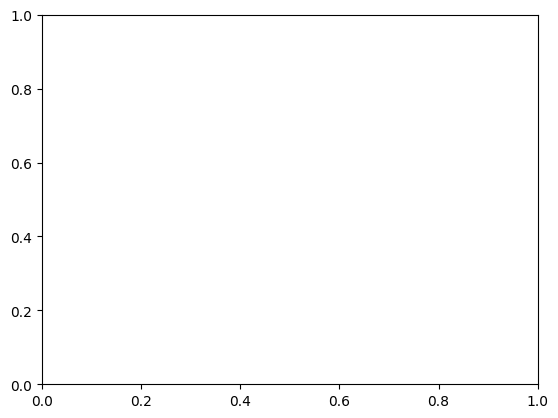

In [38]:
# 다음은 에러가 발생하는 코드임에 주의
# 이를 수정하기 위해 몇 개의 코드를 아래에 추가함
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()


In [39]:
print(losses)
type(losses)

[tensor(0.6824, device='cuda:0', grad_fn=<NllLossBackward0>), tensor(0.6978, device='cuda:0', grad_fn=<NllLossBackward0>), tensor(0.6913, device='cuda:0', grad_fn=<NllLossBackward0>), tensor(0.6744, device='cuda:0', grad_fn=<NllLossBackward0>), tensor(0.6912, device='cuda:0', grad_fn=<NllLossBackward0>), tensor(0.6668, device='cuda:0', grad_fn=<NllLossBackward0>), tensor(0.6714, device='cuda:0', grad_fn=<NllLossBackward0>), tensor(0.6483, device='cuda:0', grad_fn=<NllLossBackward0>), tensor(0.6542, device='cuda:0', grad_fn=<NllLossBackward0>), tensor(0.7872, device='cuda:0', grad_fn=<NllLossBackward0>), tensor(0.6702, device='cuda:0', grad_fn=<NllLossBackward0>), tensor(0.5818, device='cuda:0', grad_fn=<NllLossBackward0>), tensor(0.6319, device='cuda:0', grad_fn=<NllLossBackward0>), tensor(0.5400, device='cuda:0', grad_fn=<NllLossBackward0>), tensor(0.5311, device='cuda:0', grad_fn=<NllLossBackward0>), tensor(0.7852, device='cuda:0', grad_fn=<NllLossBackward0>), tensor(0.8860, device='

list

In [40]:
# 파이토치에서 item( )은 텐서에서 값을 파이썬 숫자로 추출하여 CPU로 전달
new_losses = [i.item() for i in losses]

# 처음 5개 값 출력
new_losses[:5]

[0.6824274659156799,
 0.697847843170166,
 0.6912997364997864,
 0.6743568181991577,
 0.6911898851394653]

In [41]:
# 마지막 5개 값 출력
new_losses[-5:]

[0.0437675304710865,
 0.0076516978442668915,
 0.0022940649650990963,
 0.01305986288934946,
 0.139116108417511]

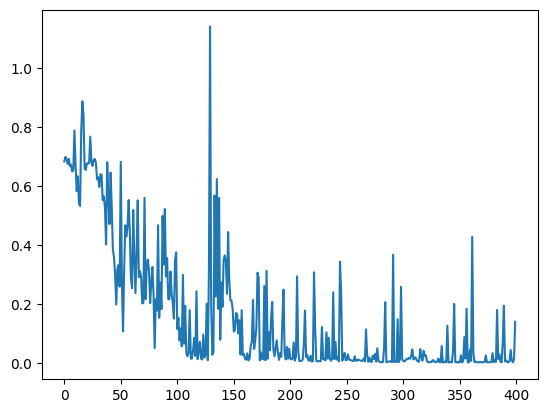

In [42]:
# matplotlib 라이브러리의 pyplot 모듈을 약칭 plt로 import
import matplotlib.pyplot as plt
plt.plot(new_losses)
plt.show();

# 3장. 모델 성능 평가

#14

In [43]:
# 모델을 eval 모드로 전환
model.eval()

# 변수 l이라는 컨테이너 리스트 생성
l = []

# 반복 루프
for test_text in test_texts:

  # 토크나이징을 통한 인코딩
  input_tokens = tokenizer([test_text], truncation=True, padding=True)

  # 모델을 사용한 추론
  outputs = model(torch.tensor(input_tokens['input_ids']).to(device))

  # outputs에 담긴 logits값을 기준으로 행 단위로, 즉 입력 문장 단위로 가장 큰 logits값의 인덱스를 출력 후
  # item( )을 사용하여 결과물 텐서 값을 추출하고 CPU로 전송
  # 이렇게 처리된 값을 입력문장별로 append( )를 통해 컨테이너 리스트 l에 하나씩 저장
  l.append(torch.argmax(outputs['logits'], axis=1).item())

# 변수 correct_cnt 초기값을 0으로 설정
correct_cnt = 0

# 리스트 l과 test_labels를 zip( )을 통해 쌍(pair)으로 묶은 후 각기 pred와 ans라는 변수로 추출
# zip()안의 데이터 쌍이 소진될 때까지 if문을 반복하여 계속 실행
for pred, ans in zip(l, test_labels):
  if pred == ans:
    # if 조건문이 참인 경우 correct_cnt값을 1씩 증가
    correct_cnt += 1

# 정확도(accuracy) 계산
# correct_cnt는 pred와 ans가 일치하는 건수의 총합
# len(test_labels)는 레이블 개수의 총합, 즉 입력 문장 전체 건수
print(correct_cnt/len(test_labels))


0.801


# 15

In [44]:
# 각 변수의 초기값을 0으로 설정
tp = 0
tn = 0
fp = 0
fn = 0

# 리스트 l과 test_labels를 zip( )을 통해 쌍(pair)으로 묶은 후 각기 pred와 ans라는 변수로 추출
# zip()안의 데이터 쌍이 소진될 때까지 반복문을 실행
for pred, ans in zip(l, test_labels):

  # tp 계산
  if pred == ans:
    if pred ==1:
      tp += 1
    else:
      tn += 1

  # fn 계산
  elif pred == 0:
    fn += 1

  # fp 계산
  elif pred == 1:
    fp +=1


In [45]:
recall = tp/(tp+fn)
print(recall)


0.9394572025052192


In [46]:
precision = tp/(tp+fp)
print(precision)


0.7258064516129032


In [47]:
(2 * precision * recall) / (precision + recall)

0.8189262966333031

#16

In [48]:
from sklearn.metrics import classification_report

print(classification_report(test_labels, l))


              precision    recall  f1-score   support

           0       0.92      0.67      0.78       521
           1       0.73      0.94      0.82       479

    accuracy                           0.80      1000
   macro avg       0.82      0.81      0.80      1000
weighted avg       0.83      0.80      0.80      1000

